In [150]:
%pylab inline
import numpy as np
import numpy.linalg as LA
from time import time
import plotly.express as px
from scipy import sparse
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$

# Homework 5
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.



**Your group member:**

# Q1: Principal Component Analysis (55pt)
Principal Component Analysis (PCA) is a dimensionality reduction algorithm that represents the data matrix as a set of principal components that are orthogonal to each other. Each of these principal components captures a source of variation in the original data matrix such that we can reduce the dimensions of the data while preserving as much information as possible. Principal components are defined as the eigenvectors of the covariance matrix of the data; thus, we will be implementing PCA using eigendecomposition.

This question will help you understand the basics of eigendecomposition. By examining the dimensionality reduction and reconstruction of images, you will think and learn more about informative representations of data.

Let’s do PCA and reconstruct pictures of faces in the PCA basis. As we will be making many visualizations of images, plot these images in a reasonable way (e.g. make the images smaller).

## Q1.1: Linear algebra (10pt)
The trace of a square matrix $\textbf{M}$, denoted, by $Tr(\textbf{M})$ is defined as the sum of
the diagonal entries of $\textbf{M}$.

 Now we prove a few claims that will be
helpful in the next problem. Define $\mathbf{\Sigma} := \frac{1}{n}
\mathbf{{X}^{\mathrm{T}}X}$, where $\mathbf{X}$ is the $n \times d$ data matrix. Let $\mathbf{x}_i$ be the $i$-th row of $\mathbf{X}$ (so $\mathbf{x}_i$ is a $d$-dimensional vector). Let $\lambda_1 \ge \lambda_2 \ge \dots \ge
\lambda_d$ be the eigenvalues of $\mathbf{\Sigma}$. Show the following two
properties:
\begin{aligned}
    Tr(\boldsymbol{\Sigma}) &= \sum_{i=1}^d \lambda_i \\
    Tr(\boldsymbol{\Sigma}) &= \frac{1}{n} \sum_{i=1}^n
||{\mathbf{x}_i}||_2^2
\end{aligned}

<p><em>Hint 1:</em> Symmetric matrices are orthogonally diagonalizable.
That is, a symmetric matrix <span
class="math inline">\(\textbf{A}\)</span> can always be written as <span
class="math inline">\(\textbf{A} = \textbf{UDU}^T\)</span>, where <span
class="math inline">\(\textbf{D}\)</span> is a diagonal matrix with the
eigenvalues of <span class="math inline">\(\textbf{A}\)</span> along the
diagonal and <span class="math inline">\(\textbf{U}\)</span> is an
orthogonal matrix, whose columns are the eigenvectors of <span
class="math inline">\(\textbf{A}\)</span>.</p>
<p><em>Hint 2:</em> <span
class="math inline">\(Tr(\textbf{A}{\textbf{B}}^{\mathrm{T}}) =
Tr({\textbf{B}}^{\mathrm{T}}\textbf{A})\)</span> for two matrices <span
class="math inline">\(\textbf{A}\)</span> and <span
class="math inline">\(\textbf{B}\)</span> of size <span
class="math inline">\(n \times d\)</span>.</p></li>

# Your Solution:

1.

First, note $\mathbf{\Sigma}^{\mathrm{T}} = (\frac{1}{n}\mathbf{X}^{\mathrm{T}}\mathbf{X})^{\mathrm{T}} = \frac{1}{n}(\mathbf{X}^{\mathrm{T}}\mathbf{X})^{\mathrm{T}} = \frac{1}{n}(\mathbf{X})^{\mathrm{T}}(\mathbf{X}^{\mathrm{T}})^{\mathrm{T}} = \frac{1}{n}\mathbf{X}^{\mathrm{T}}\mathbf{X} = \mathbf{\Sigma}$, so $\mathbf{\Sigma}$ is symmetric.

Since $\mathbf{\Sigma} \in \mathcal{R}^{d\times d}$ is symmetric, we can decompose as $\mathbf{\Sigma} = \mathbf{UDU}^{\mathrm{T}},$ where $\mathbf{U} \in \mathcal{R}^{d\times d}$ is orthogonal and $\mathbf{D} \in \mathcal{R}^{d\times d}$ is diagonal with each value an eigenvalue of $\mathbf{\Sigma}$, i.e. $\mathbf{D}_{ii} = \lambda_i$.

Now, we wish to show the cyclic property of trace. Suppose we have matricies $G\in \mathcal{R}^{a\times b}$ and $H\in \mathcal{R}^{b\times a}$. Then, $Tr(GH) = \sum_{i=1}^a \sum_{j=1}^b G_{ij}H_{ji} = \sum_{i=1}^a \sum_{j=1}^b H_{ji}G_{ij} = Tr(HG)$.

We can use this in conjuntion with the associative rules of matrix multiplication, i.e. $Tr(A(BC)) = Tr((BC)A)$ (so long as the matrix multiplication is valid).

Then, using the cyclic property of trace and orthogonal matrix property $\mathbf{U}^{\mathrm{T}}\mathbf{U}=\mathbf{I}$, we have:
$Tr(\mathbf{\Sigma}) = Tr(\mathbf{U}(\mathbf{DU}^{\mathrm{T}})) = Tr((\mathbf{DU}^{\mathrm{T}})\mathbf{U}) = Tr(\mathbf{D}(\mathbf{U}^{\mathrm{T}}\mathbf{U})) = Tr(\mathbf{D}\mathbf{I}) = Tr(\mathbf{D}) = \sum_{i=1}^d \mathbf{D}_{ii} = \sum_{i=1}^d \lambda_i$.


2.

First, note $Tr(\frac{1}{n}M) = \sum_{i=1}^n \frac{1}{n}M_{ii} = \frac{1}{n} \sum_{i=1}^n M_{ii} = \frac{1}{n} Tr(M).$

Now, consider $A = \mathbf{X}\mathbf{X}^{\mathrm{T}} \in \mathcal{R}^{n\times n}$. The ith diagonal entry of $A$ (by matrix multiplication) is $A_{ii} = \mathbf{x}_i\mathbf{x}_i^{\mathrm{T}} = ||{\mathbf{x}_i}||_2^2$.

Then, $Tr(\mathbf{\Sigma}) = Tr(\frac{1}{n}\mathbf{X}^{\mathrm{T}}\mathbf{X}) = \frac{1}{n}Tr(\mathbf{X}^{\mathrm{T}}\mathbf{X}) = \frac{1}{n}Tr(\mathbf{X}\mathbf{X}^{\mathrm{T}}) = \frac{1}{n}Tr(A) = \frac{1}{n}\sum_{i=1}^n ||{\mathbf{x}_i}||_2^2$.



---

## Q1.2 Linear algebra (10pt)
Now we have a $d \times k$ projection matrix $\mathbf{P}$ with $\mathbf{P}^{T}\mathbf{P}=\mathbf{I}_{k}$.
We have the linear projection from $\mathbb{R}^{n \times d}$ to $\mathbb{R}^{n \times k}$: $\mathbf{X} \mapsto \mathbf{X}\mathbf{P}$.
We have the following result:</p>
<p><span class="math display">\[\mathop{\arg\max}_{\mathbf{P} \in
\mathbb{R}^{d \times k}, \mathbf{P}^{T} \mathbf{P}=\mathbf{I}}
\operatorname{Tr}\left(\frac{1}{n}\mathbf{P}^{T}\mathbf{X}^{T} \mathbf{
X P}\right) =  \mathbf{P}^{*}\]</span></p>
<p>where each column of <span
class="math inline">\(\mathbf{P}^{*}\)</span> is the corresponding
eigenvector <span class="math inline">\(u_{i}\)</span> for <span
class="math inline">\(\lambda_{i}\)</span> with <span
class="math inline">\(i = 1, ..., k\)</span>. Note that <span
class="math inline">\(u_{i}\)</span> and <span
class="math inline">\(\lambda_{i}\)</span> are the eigenvectors and
eigenvalues of <span class="math inline">\(\mathbf{\Sigma}\)</span> as
defined in 1.a.1. Please prove: <span
class="math display">\[Tr(\frac{1}{n}\mathbf{P}^{*T}\mathbf{X}^{T}\mathbf{X}\mathbf{P}^{*})
= \sum_{i = 1}^{k}\lambda_{i}\]</span>.</p>
<p>With the result obtained in part 1, we have <span
class="math inline">\(1 -
\frac{\lambda_{1}+\cdots+\lambda_{k}}{\lambda_{1}+\cdots+\lambda_{d}} =
1 -
\frac{\sum_{i=1}^n||{\mathbf{P}^{*T}\mathbf{x}_i}^2||}{\sum_{i=1}^n||{\mathbf{x}_i}^2||}\)</span>.
This metric is called the PCA fractional reconstruction error of using
the top <span class="math inline">\(k\)</span> out of $d$ directions.

# Your Solution:

Define $\mathbf{\Sigma} = \frac{1}{n}\mathbf{X}^{\mathrm{T}}\mathbf{X}$ and note $\frac{1}{n}\mathbf{P}^{*T}\mathbf{X}^{T}\mathbf{X}\mathbf{P}^{*} = \mathbf{P}^{*T}(\frac{1}{n}\mathbf{X}^{T}\mathbf{X})\mathbf{P}^{*} = \mathbf{P}^{*T}\mathbf{\Sigma}\mathbf{P}^{*}$.

Since $\mathbf{\Sigma}$ is symmetric, we have $\mathbf{P}^{*T}\mathbf{\Sigma}\mathbf{P}^{*} = \mathbf{P}^{*T}\mathbf{UDU}^{\mathrm{T}}\mathbf{P} := \mathbf{Y}^{\mathrm{T}}\mathbf{DY}, \mathbf{Y}\in \mathcal{R}^{d\times k}$

Consider the matrix multiplication of $A = \mathbf{Y}^{\mathrm{T}}\mathbf{D} \in \mathcal{R}^{k\times d}.$ Each row of $A$ is $\mathbf{y}_i\vec{\lambda}$, where $\mathbf{y}_i$ is the $ith$ column of $\mathbf{Y}.$

Then, the $i$th diagonal of $\mathbf{Y}^{\mathrm{T}}\mathbf{DY}$ is simply $\lambda_i (\mathbf{y}_i \cdot \mathbf{y}_i),$ but under our initial conditions, $\mathbf{y}_i \cdot \mathbf{y}_i = 1,$ so each diagonal entry is just $\lambda_i$.

Thus,

$$
\begin{align*}
Tr(\frac{1}{n}\mathbf{P}^{*T}\mathbf{X}^{T}\mathbf{X}\mathbf{P}^{*}) &= Tr(\mathbf{P}^{*T}\mathbf{\Sigma}\mathbf{P}^{*})\\
&= Tr(\mathbf{P}^{*T}\mathbf{UDU}^{\mathrm{T}}\mathbf{P}^{*})\\
&= Tr(\mathbf{Y}^{\mathrm{T}}\mathbf{D}\mathbf{Y})\\
&= \sum_{i = 1}^{k}\lambda_{i} (\mathbf{y}_i \cdot \mathbf{y}_i)\\
&= \sum_{i = 1}^{k}\lambda_{i} .
\end{align*}
$$



---



## Q1.3: Face (15pt)
For this question we will use the dataset
<span><code>faces.csv</code></span> from <code>pca/data</code> (adapted
from <a
href="http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html">the
Extended Yale Face Database B</a>), which is composed of facial pictures
of 38 individuals under 64 different lighting conditions such as lit
from the top, front, and side (some lighting conditions are missing for
some people). In total, there are 2414 images, where each image is 96
pixels high and 84 pixels wide (for a total of 8064 pixels per image).
Each row in the dataset is a single image flattened into a vector in a
column-major order. The images are in grayscale, so each pixel is
represented by a single real number between <span
class="math inline">\(0\)</span> (black) and <span
class="math inline">\(1\)</span> (white).

Define $\boldsymbol{\Sigma}$, a
$8064 \times 8064$ matrix, as
follows: $$\boldsymbol{\Sigma} = \frac{1}{n}
\sum_{i=1}^n \textbf{x}_i {\textbf{x}}^{\mathrm{T}}_i$$ where the
$\textbf{x}_i$’s are points in our
dataset as <strong>column</strong> vectors and $n = 2414$ is the number of points in the
dataset. Now compute the top 50 PCA dimensions; these are the 50
dimensions which best reconstruct the data.</p>
<p>We will be implementing PCA using eigendecomposition. Thus, you may
use library functions for obtaining the eigenvalues and eigenvectors of
a matrix (e.g. <code>numpy.linalg.eigh</code> in Python). You should
<strong>not</strong> use functions which directly compute the principal
components of a matrix.

**Data access:** the data is stored in https://drive.google.com/file/d/1h0-DSjz59VOQJMbghIh1pKReTtU7_owV/view?usp=sharing.

**Load Data:** Once you open the link in the brower, make sure you click the "Add shortcut to Drive" and now your google drive should show up the zip file.  Then you run the following code to link colab to your google drive.

Please answer the following questions.
1. What are the eigenvalues $\lambda_1, \lambda_2, \lambda_{10}, \lambda_{30}$ and $\lambda_{50}$? Also, what is the sum of eigenvalues $\sum_{i=1}^d\lambda_i$?

2. We know fractional reconstruction error of using the top $k$ out of $d$ directions is $1 -
\frac{\lambda_{1}+\cdots+\lambda_{k}}{\lambda_{1}+\cdots+\lambda_{d}}$. This means that when $k = d$, our reconstruction error is 0, which basically means that we use all the principal components and simply reconstruct the original matrix. Plot this fractional reconstruction error for each of the first 50 values of $k$ (i.e. $k$ from 1 to 50). So the X-axis is $k$ and the Y-axis is the fractional reconstruction error. Make sure your plots are legible at reasonable zoom and the axes are labeled in your write-up.

3. Using 1-3 sentences, explain what the first eigenvalue captures, and why you think $\lambda_1$ is much larger than the other eigenvalues.

In [151]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/ualbany courses/Machine Learning/hw5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
faces = np.genfromtxt('faces.csv', delimiter=',')
faces_mean = np.mean(faces, axis=0)
faces = faces - faces_mean

In [153]:
n,d = faces.shape
print(n,d)

# get eigen information
sigma = faces.T @ faces / n
eig_val , eig_vec = LA.eigh(sigma)

2414 8064


Eigenvalue 1: 167.46953849118606 ; Sum of Eigenvalues up to Eigenvalue 1: 167.46953849118606
Eigenvalue 2: 160.94165806576297 ; Sum of Eigenvalues up to Eigenvalue 2: 328.411196556949
Eigenvalue 10: 3.0804228105122173 ; Sum of Eigenvalues up to Eigenvalue 10: 393.21708078405436
Eigenvalue 30: 0.7831902761674437 ; Sum of Eigenvalues up to Eigenvalue 30: 422.23653217239996
Eigenvalue 50: 0.3895740862028482 ; Sum of Eigenvalues up to Eigenvalue 50: 433.3018731283802


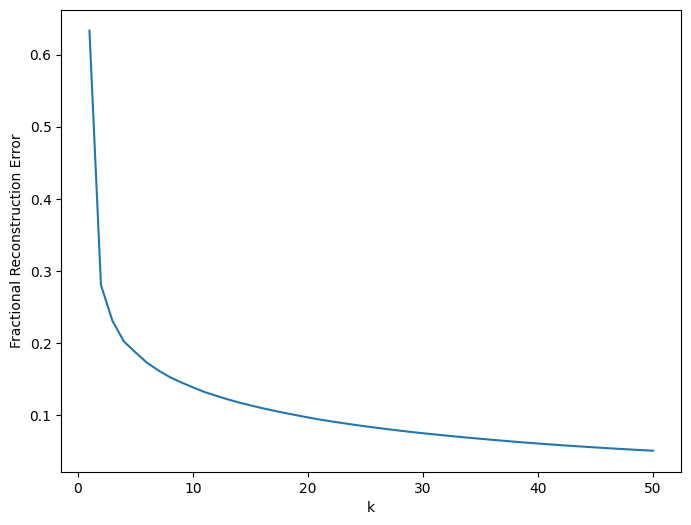

In [154]:
eig_vec = np.real(eig_vec).T
idx = np.argsort(eig_val)[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[idx]

index_list = [1,2,10,30,50]

# 1.
for i in index_list:
    print('Eigenvalue '+str(i)+': '+str(eig_val[i-1])+
          ' ; Sum of Eigenvalues up to Eigenvalue '+str(i)+': '+str(np.sum(eig_val[:i])))

# 2.
frac_recon = []
for k in range(50):
    frac_recon.append([k+1, 1 - (np.sum(eig_val[:k+1]) / np.sum(eig_val))])
frac_recon = np.asarray(frac_recon).T
plt.plot(frac_recon[0],frac_recon[1])
plt.xlabel('k')
plt.ylabel('Fractional Reconstruction Error')
plt.show()

# Your Solution:

The eigenvalues capture the amount of vairance associated with each feature, thus higher valued eigenvalues correlate to higher variance features, and lower valued eigenvalues correlate to lower variance features. In essence, this means the highest valued eigenvalue (which in our sorted form is $\lambda_1$) holds the most information, because it represents the highest variance in our model.

$\lambda_1$ represents facial structure, i.e a gray scale that generates a generic face. The more "information" we get about the face (i.e. more eigen values we add), the more details the face recovers.



---

## Q1.4: Visualization of the Eigen-Directions (10pt)
Now let us get a sense of the what the top PCA directions are capturing (recall these are the directions which capture the most variance).

Display the first 10 eigenvectors as images. Label the images to denote which eigenvector each image denotes. Provide a brief interpretation (4-6 sentences) of what you think each eigenvector captures (Hint: Look at each image and think about what features of the image the eigenvector is capturing).

  - **Hint 1**: If the images appear like random lines, try reshaping differently and then transposing.
  - **Hint 2**: The eigenvectors you obtain are normalized to have length 1 in the L2 norm, thus their entries are extremely small. To avoid getting all-black images, make sure to re-normalize the image. in Python, `matplotlib.pyplot.imshow` does this by default.

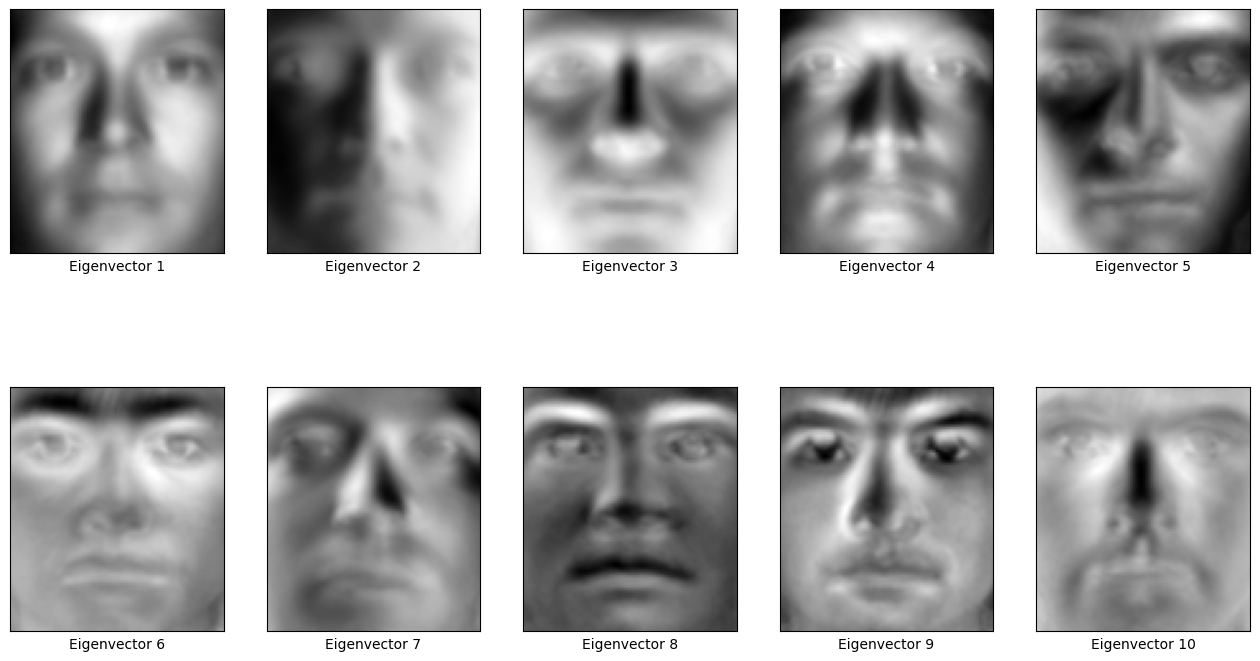

In [155]:
# Plot eigenvectors
fig, axs = plt.subplots(2,5, figsize=(16,9))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xlabel('Eigenvector '+str(i+1))
    plt.imshow(eig_vec[i].reshape((84,96)).T, cmap='gray')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()


# Your Solution:

It looks as if each eigenvector has some attribute to the greyscale of the overall set of images. The greyscale of the eigenvectors corresponds to defining features of a human face, seeming to range in importance to what that feature gives a face in terms of uniqueness.

For example, the first eigen vector seems to outline the general structure of a face with where the darker spots lie, the second looks like lighting, the third and tenth seem to be nose structure, the sixth looks like eyebrows and so on.

Eigenvalues determine the importance of each of these eigenvectors (at least in terms of "facial structure" information).



---
## Q1.5: Reconstruction (10pt)
We will now observe the reconstruction using PCA on a sample of images composed of the following images:
- image 1 (row 0).

- image 24 (row 23).

- image 65 (row 64).

- image 68 (row 67).

- image 257 (row 256).

In the previous parts, we used eigendecomposition to extract the top $k$ eigenvectors of $\Sigma$. Now, we will examine reconstruction using PCA.

For each of these images, plot the original image and plot the projection of the image onto the top $k$ eigenvectors of $\Sigma$ for $k = 1,2,5,10,50$. In particular, if $U$ is the $d × k$matrix of the top $k$ eigenvectors, the reconstruction matrix will be $UU^\top$.

Specifically, you should obtain a $5 × 6$ table where in each row corresponds to a single image, the first cell in every row is the original image and the following cells are the reconstructions of the image with the 5 different values of $k$.

**Hint:** In this problem, we are observing (partial) combinations of images that already have a meaningful scale. Therefore, we want to keep the scale of the results and not re-normalize the images (in contrast to part (c)). If you are using matplotlib.pyplot.imshow in Python, you should pass the additional arguments vmin=0, vmax=1, e.g. `imshow(im, vmin=0, vmax=1)`.

In [156]:
# running this if needing a transpose
eig_vec = eig_vec.T

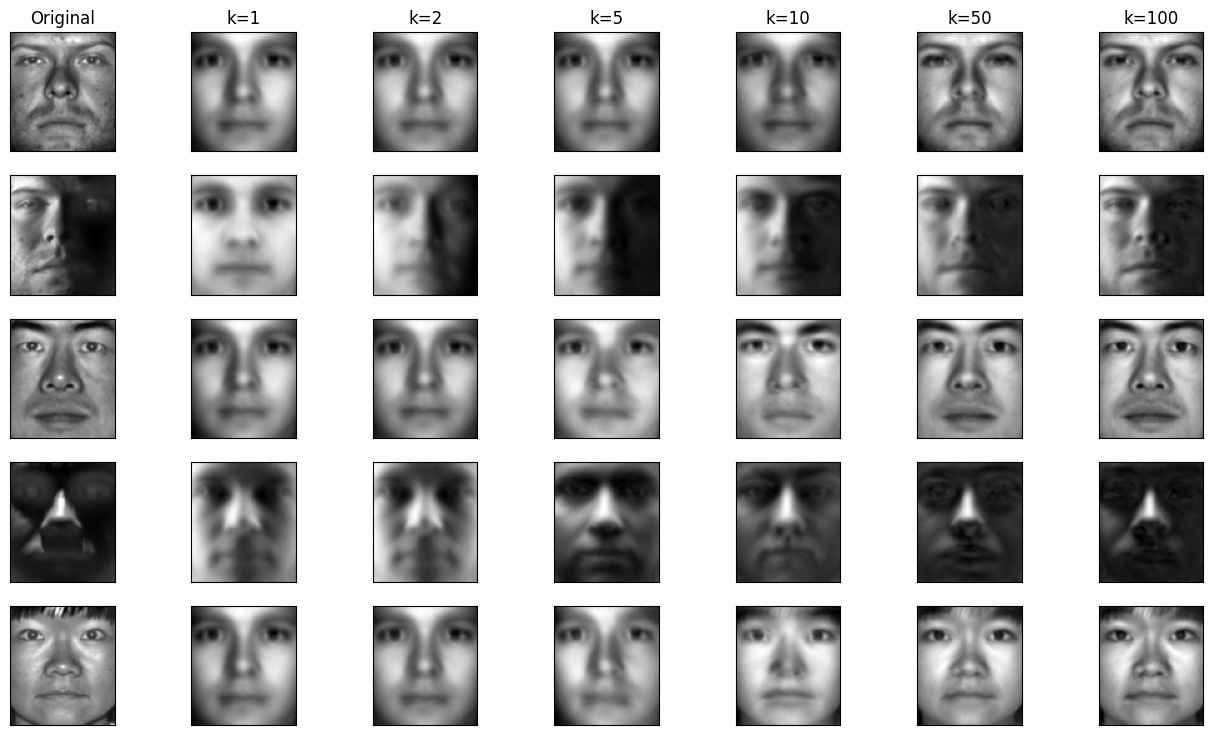

In [157]:
# adding one more plot for lambda_100 for interest
fig, axs = plt.subplots(5,7, figsize=(16,9))
axs[0, 0].set_title('Original')
axs[0, 1].set_title('k=1')
axs[0, 2].set_title('k=2')
axs[0, 3].set_title('k=5')
axs[0, 4].set_title('k=10')
axs[0, 5].set_title('k=50')
axs[0, 6].set_title('k=100')

num_plots_made = 1
for image in [0,23,64,67,256]:
    plt.subplot(5,7,num_plots_made)
    plt.imshow(faces[image].reshape((84, 96)).T, cmap='gray')
    num_plots_made+=1
    for k in [1,2,5,10,50,100]:
        comp = eig_vec[:,:k]
        proj_face = faces.dot(comp).dot(comp.T) + faces_mean
        x = np.reshape(proj_face, [n,84,96])
        plt.subplot(5,7,num_plots_made)
        plt.imshow(x[image].T, cmap='gray')

        num_plots_made+=1

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()



---



---

# Q2: Facial Recognition (20pt)
In this assignment, we will use the logistic regression with Softmax for face recognition. Our task here is to be able to predict the correct label (name of the person) given an image of his face.

For this task, we will use a dataset called [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/), which contains 13233 images of faces which belong to  5749 people. Each image in the dataset is labeled with a number corresponding to a person's name. All the images in the dataset are cropped and resized to the same image size.

To load the data, we will use the scikit-learn's function [sklearn.datasets.fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html). To make our life a bit easier we will only use faces of people which appear in the dataset more than 100 times.

Let's do multi-class classification with the softmax function.
Remember the model is as follows:

1. the probability for $K$ classes are  
\begin{align}
\text{Pr}(y=\ell |\mathbf{x}, \mathbf{W}) = \frac{\exp(\mathbf{w}_\ell \cdot \mathbf{x})}{\sum_{j=0}^{K-1} \exp(\mathbf{w}_j \cdot \mathbf{x}) }
\end{align}
where $\mathbf{w}_\ell $ is $\ell$-th row of $\mathbf{W}$. Here we ignore the bias vector.

2. In prediction, you will take the largest predicted probability among your $K$ predicted probability.

3. The negative log-likelihood function on the $N$ training dataset is
\begin{align}
L(\mathbf{W}) = -\frac{1}{N}\sum_{i=1}^N \log \text{Pr}(y=y^{(i)} | \mathbf{x}^{(i)}, \mathbf{W})
\end{align}
The following figure illustrates the logistic regression with softmax on the MNIST dataset (of course with the bias vector).
<img src="https://github.com/yexf308/MAT592/blob/main/image/MNIST_LR.png?raw=true" width="800" />



Number of images in the dataset: 1140
Number of different persons in the dataset: 5
Each images size is: (62, 47)


<ipython-input-158-e95afd42cc8c>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(label_to_name_mapping, rotation=-90);


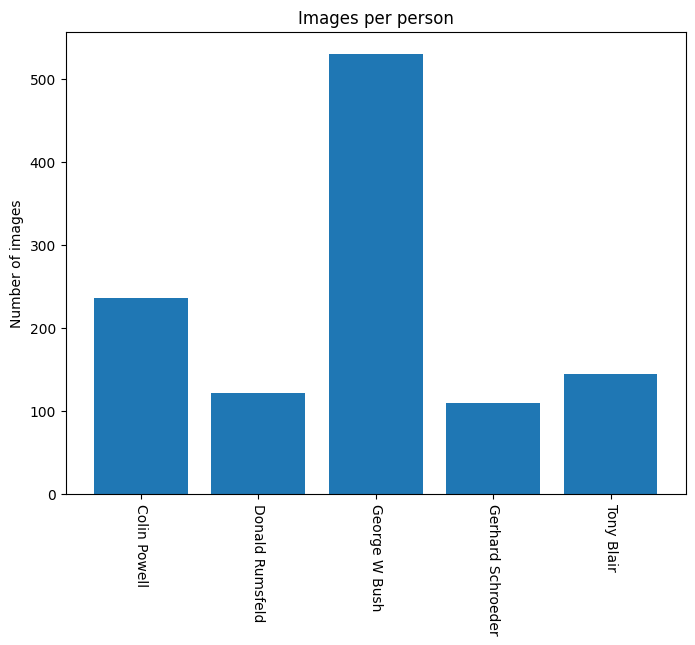

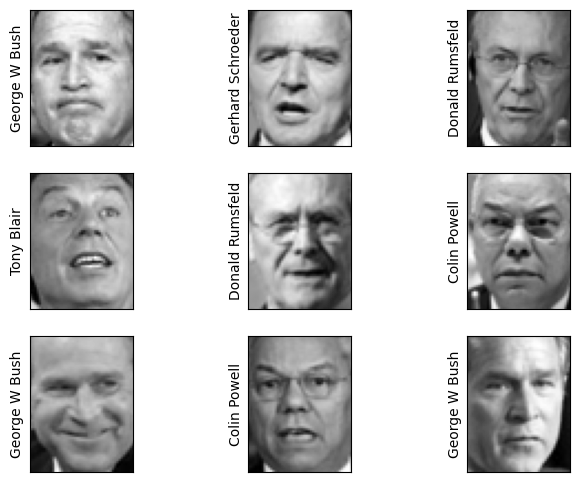

In [158]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=100)

X = dataset.images
y = dataset.target
label_to_name_mapping = dataset.target_names
image_shape = X[0].shape

print('Number of images in the dataset: {}'.format(len(X)))
print('Number of different persons in the dataset: {}'.format(len(np.unique(y))))
print('Each images size is: {}'.format(image_shape))

_, images_per_class = np.unique(y, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label_to_name_mapping, images_per_class)
ax.set_xticklabels(label_to_name_mapping, rotation=-90);
ax.set_title('Images per person')
ax.set_ylabel('Number of images')


# plots the first 20 images in the dataset.
fig, ax_array = plt.subplots(3, 3)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(X[i], cmap='gray')
    ax.set_ylabel(label_to_name_mapping[y[i]])
    ax.set_yticks([])
    ax.set_xticks([])

In [159]:
from sklearn.model_selection import train_test_split
# split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)
print(X_test.shape)

(912, 2914)
(228, 2914)


In [160]:
print(y_train[:20])

[2 2 2 0 2 2 4 4 2 0 2 3 1 2 2 2 2 0 0 2]




---




## Q2.1 Derivative (10pt)
Express the label $y$ into one hot vector, i.e., $y=\ell$ is represented by $\vec{y}$ with $\vec{y}_\ell =1$ and other indices are zero.

Calculate the derivative of the negative log-likelihood with respect to the variable $\mathbf{W}$. Write this in a natural manner in terms of conditional probability, the data matrix $\mathbf{X}$. Don't write this expression in terms of exponentials directly.
You may refer to results in previous lectures.

# Your Answer:

Note that the derivative of $L(\mathbf{W})$ is the gradient
$\nabla L(\mathbf{W}) = -\frac{1}{N}\begin{bmatrix}\frac{\delta}{\delta\vec{\mathbf{w}}_1} L(\mathbf{W})\\ \dots \\ \frac{\delta}{\delta\vec{\mathbf{w}}_K} L(\mathbf{W}) \end{bmatrix}.$

We consider the $k$th entry of $-N * \nabla L(\mathbf{W})$, denoted $L_k(\mathbf{W}):$

$$
\begin{align*}
L_k(\mathbf{W}) &= \frac{\delta}{\delta\vec{\mathbf{w}}_k} L(\mathbf{W})\\
&= \frac{\delta}{\delta\vec{\mathbf{w}}_k} \sum_{i=1}^N \log \text{Pr}(y=c | \mathbf{x}^{(i)}, \mathbf{W})\\
&= \frac{\delta}{\delta\vec{\mathbf{w}}_k} \sum_{i=1}^N \log \frac{\exp(\mathbf{w}_c \cdot \mathbf{x}^{(i)})}{\sum_{j=0}^{K-1} \exp(\mathbf{w}_j \cdot \mathbf{x}^{(i)}) }\\
:&= \frac{\delta}{\delta\vec{\mathbf{w}}_k} \sum_{i=1}^N \log \frac{\gamma^{(i)}_c}{\mathbf{\sigma}^{(i)}}\\
&= \sum_{i=1}^N \frac{\left(\frac{(\frac{\delta}{\delta\vec{\mathbf{w}}_k}\gamma^{(i)}_c)\sigma^{(i)} - (\frac{\delta}{\delta\vec{\mathbf{w}}_k}\sigma^{(i)})\gamma^{(i)}_c}{(\sigma^{(i)})^2} \right)}{\left(\frac{\gamma^{(i)}_c}{\mathbf{\sigma}^{(i)}}\right)},\\
\\
\text{where... } \frac{\delta}{\delta\vec{\mathbf{w}}_k}\gamma^{(i)}_c &= \frac{\delta}{\delta\vec{\mathbf{w}}_k} \exp(\mathbf{w}_c \cdot \mathbf{x}^{(i)}) = \begin{cases} \mathbf{x}^{(i)}\gamma^{(i)}_c, & \text{if } k = c\\
0, & \text{if } k \neq c \end{cases} \\
\text{and... } \frac{\delta}{\delta\vec{\mathbf{w}}_k}\sigma^{(i)}_c &= \frac{\delta}{\delta\vec{\mathbf{w}}_k} \sum_{j=0}^{K-1} \exp(\mathbf{w}_j \cdot \mathbf{x}^{(i)}) =  \mathbf{x}^{(i)}\gamma^{(i)}_k,\\
\\
\text{so...} L_k(\mathbf{W}) &= \sum_{i=1}^N \frac{\left(\frac{(\frac{\delta}{\delta\vec{\mathbf{w}}_k}\gamma^{(i)}_c)\sigma^{(i)} - (\mathbf{x}^{(i)}\gamma^{(i)}_k)\gamma^{(i)}_c}{(\sigma^{(i)})^2} \right)}{\left(\frac{\gamma^{(i)}_c}{\mathbf{\sigma}^{(i)}}\right)}\\
\\
&= \sum_{i=1}^N \left(\frac{(\frac{\delta}{\delta\vec{\mathbf{w}}_k}\gamma^{(i)}_c)\sigma^{(i)} - (\mathbf{x}^{(i)}\gamma^{(i)}_k)\gamma^{(i)}_c}{\gamma^{(i)}_c\sigma^{(i)}} \right)\\
\\
&= \sum_{i=1}^N \left(\frac{(\frac{\delta}{\delta\vec{\mathbf{w}}_k}\gamma^{(i)}_c)}{\gamma_c^{(i)}} - \frac{(\mathbf{x}^{(i)}\gamma^{(i)}_k)}{\sigma^{(i)}} \right)\\
\\
&= \sum_{i=1}^N \left(\frac{(\frac{\delta}{\delta\vec{\mathbf{w}}_k}\gamma^{(i)}_c)}{\gamma_c^{(i)}} - \mathbf{x}^{(i)}\text{Pr}(y=k | \mathbf{x}^{(i)}, \mathbf{W}) \right)\\
\\
&= \begin{cases} \sum_{i=1}^N \mathbf{x}^{(i)}\left( 1 - \text{Pr}(y=c | \mathbf{x}^{(i)}, \mathbf{W}) \right), & \text{if } k=c\\
\sum_{i=1}^N (-\mathbf{x}^{(i)}\text{Pr}(y=k | \mathbf{x}^{(i)}), \mathbf{W}), & \text{if } k \neq c
\end{cases} .
\end{align*}
$$

Thus, $L_k(\mathbf{W})$ is a vector and $L_k(\mathbf{W})[i] = \begin{cases} \sum_{i=1}^N \mathbf{x}^{(i)}\left( 1 - \text{Pr}(y=c | \mathbf{x}^{(i)}, \mathbf{W}) \right), & \text{if } k=i\\
\sum_{i=1}^N (-\mathbf{x}^{(i)}\text{Pr}(y=k | \mathbf{x}^{(i)}), \mathbf{W}), & \text{if } k \neq i \end{cases}$.


We have then that $\nabla L(\mathbf{W}) = \frac{1}{N}\sum_{i=1}^N \mathbf{x}^{(i)} * \begin{bmatrix} \text{Pr}(y=1 | \mathbf{x}^{(i)}, \mathbf{W}) - 1 & \text{Pr}(y=2 | \mathbf{x}^{(i)}, \mathbf{W}) & ... & \text{Pr}(y=K | \mathbf{x}^{(i)}, \mathbf{W})\\
\text{Pr}(y=1 | \mathbf{x}^{(i)}, \mathbf{W}) & \text{Pr}(y=2 | \mathbf{x}^{(i)}, \mathbf{W}) - 1 & ... & \text{Pr}(y=K | \mathbf{x}^{(i)}, \mathbf{W})\\
... & ... & ... & ...\\
\text{Pr}(y=1 | \mathbf{x}^{(i)}, \mathbf{W}) & \text{Pr}(y=2 | \mathbf{x}^{(i)}, \mathbf{W}) & ... & \text{Pr}(y=K | \mathbf{x}^{(i)}, \mathbf{W}) - 1   \end{bmatrix} \in \mathcal{R}^{KxK}.$








---
## Q2.2 Implementation (10pt)
(a) Implement softmax classification with SGD. Specify your learning rate (or your learning rate decay scheme if you alter learning rate).

(b) For both training dataset and testing dataset, plot the negative log-likelihood as function of the epoch number.

(c) For both training dataset and testing dataset, plot the misclassification rate as function of the epoch number.

(d) How many iterations did this take you?


In [161]:
def get_probs(x_i, y_vals, W):
    prob_vec = np.zeros(len(y_vals))
    for y in y_vals:
        num = np.exp(W[y].dot(x_i))
        den = 0
        for w in W:
            den += np.exp(w.dot(x_i))
        prob_vec[y] = num/den
    return np.asarray(prob_vec)

def unison_shuffled_copies(a, b):
    # returns a shuffled list of both x and y with respect to their indicies
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def sgd(X, Y, X_test, Y_test, max_epoch, batch_size, learn_rate, conv_cal):

    n,d = X.shape
    assert batch_size <= n
    y_uniques = np.unique(Y)
    K = len(y_uniques)
    W = np.zeros((K,d))
    prev_sum_error = 0
    epoch = 0
    train_data = []
    test_data = []

    while epoch < max_epoch:
        epoch+=1
        sum_error = 0
        log_like = 0
        class_error = 0

        # shuffle x, y
        X,Y = unison_shuffled_copies(X, Y)

        # getting batch
        if batch_size == 0:
            batch_size = n
            batch_x, batch_y = X, Y
        else:
            batch_x, batch_y = X[:batch_size], Y[:batch_size]

        for idx in range(batch_size):
            # onehot of y_i
            onehot_y = np.zeros(K)
            onehot_y[batch_y[idx]] = 1

            # probability and error for current epoch
            probs = get_probs(batch_x[idx], y_uniques, W)
            max_prob_idx = np.argmax(probs)
            error = probs-onehot_y
            sum_error += -np.dot(onehot_y, np.log(probs)) # cross entropy

            # learning W
            for j in range(K):
                W[j] = W[j] - learn_rate * error[j] * batch_x[idx]

            # log likelyhood calculation
            for p in probs:
                log_like -= np.log(p)

            # classification error
            if max_prob_idx != batch_y[idx]:
                class_error += 1

        # train data appending
        train_data.append([epoch, log_like/batch_size, class_error/batch_size, sum_error])

        # getting testing data
        n_test = X_test.shape[0]
        sum_error = 0
        log_like = 0
        class_error = 0

        # shuffle x, y
        X_test,Y_test = unison_shuffled_copies(X_test, Y_test)

        for idx in range(n_test):
            probs = get_probs(X_test[idx], y_uniques, W)
            max_prob_idx = np.argmax(probs)
            onehot_y = np.zeros(K)
            onehot_y[Y_test[idx]] = 1
            sum_error += -np.dot(onehot_y, np.log(probs)) # cross entropy

            # log likelyhood calculation
            for p in probs:
                log_like -= np.log(p)

            # classification error
            if max_prob_idx != Y_test[idx]:
                class_error += 1

        # test data appending
        test_data.append([epoch, log_like/n_test, class_error/n_test, sum_error])

        # convergence check
        if abs(sum_error-prev_sum_error) < conv_cal:
            print("Convergence met. Ending epoch = ", epoch)
            break
        else:
            prev_sum_error = sum_error

        if epoch%10==0:
            print("sum error at epoch", epoch,": ", sum_error)

    return train_data, test_data



In [162]:
max_epoch = 200
batch_size = 0
learn_rate = .01
conv_cal = .1

data_train, data_test = sgd(X_train, y_train, X_test, y_test, max_epoch, batch_size, learn_rate, conv_cal)
# data_test = sgd(X_test, y_test, max_epoch, batch_size, learn_rate, conv_cal)
# data comes as epoch, NLL, classification_error, sum_error

data_train = np.asarray(data_train).T
data_test = np.asarray(data_test).T

sum error at epoch 10 :  283.4687663604461
sum error at epoch 20 :  137.19137594604263
sum error at epoch 30 :  122.07407098055138
sum error at epoch 40 :  150.96648778409835
sum error at epoch 50 :  169.42712296408803
sum error at epoch 60 :  120.16458567090297
sum error at epoch 70 :  111.36614498324438
sum error at epoch 80 :  136.59016443542313
sum error at epoch 90 :  124.45532964337477
sum error at epoch 100 :  119.37282487658632
Convergence met. Ending epoch =  104


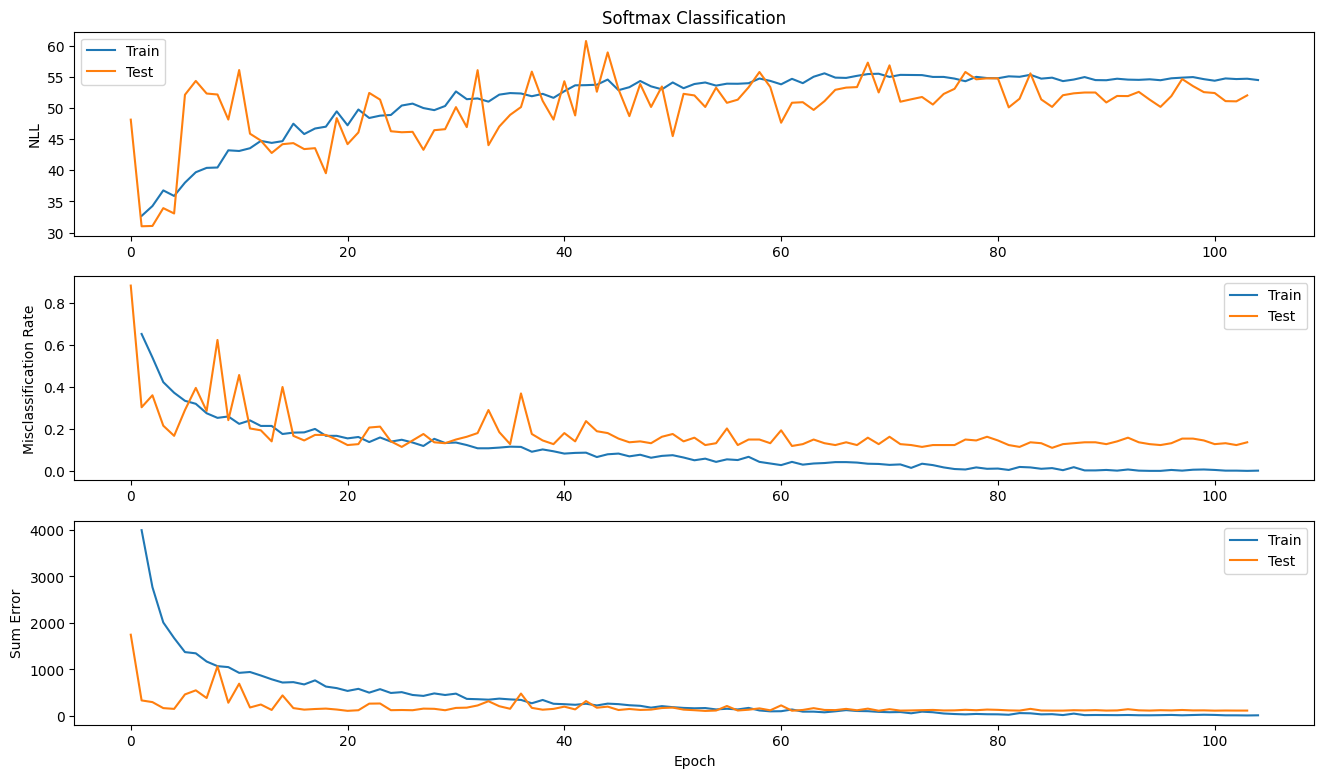

In [163]:
fig, axs = plt.subplots(3,1, figsize=(16,9))

plt.subplot(3,1,1)
plt.title("Softmax Classification")
plt.ylabel('NLL')
plt.plot(data_train[0],data_train[1],data_test[1])
plt.legend(['Train', 'Test'])
plt.subplot(3,1,2)
plt.ylabel('Misclassification Rate')
plt.plot(data_train[0],data_train[2],data_test[2])
plt.legend(['Train', 'Test'])
plt.subplot(3,1,3)
plt.xlabel('Epoch')
plt.ylabel('Sum Error')
plt.plot(data_train[0],data_train[3],data_test[3])
plt.legend(['Train', 'Test'])
plt.show()

In [164]:
max_epoch = len(data_test[0])
conv_misclass_rate = data_test[2][max_epoch-1]
print("Misclassification Rate of Testing Data at Convergence Epoch ("+str(max_epoch)+"): "+str(conv_misclass_rate))

Misclassification Rate of Testing Data at Convergence Epoch (104): 0.13596491228070176


# Your Answer:

Using a constant learn rate of .01 and a convergence value of .1 where convergence is tested by taking the current and previous epoch's total cross validation error, we reached convergence at epoch 125. There is a lot variance to these results due to randomness, but typically we reach convergence between 100 and 180 but I've gotten it to stop at 54 once, so it's really a grab bag.



---



---

# Q3: Deep neural network (25pt)

We will use the same dataset [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) in the last question. We will use the exact same training and testing dataset as before.
In these problem, we are not allowed to use pyTorch yet!

##  Q3.1: Deep neural network with Sigmoid function and squared loss (10pt)
In class, we showed how to implement DNN with the sigmoid function as the activation function. In particular, the output layer also uses the sigmoid function. Here you may try constant learning rate.

(a) Please setup your own deep neural network to classify these faces. Here you can use sigmoid function as activation function and output function, and you can use the square loss function as well. But you have to choose the number of the layer and hidden neurons by yourself. **Happy tuning!**

(b) For both training dataset and testing dataset, plot the cost as function of the epoch number.

(c) For both training dataset and testing dataset, plot the misclassification rate as function of the epoch number.

(d) Did DNN performs better than logistic regression or not?


In [165]:
# various methods for DNN

def Sigmoid(z,derivative=False):
    """Compute Sigmoid or its derivative"""
    sigma = 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    if derivative:
        return sigma * (1-sigma)
    return sigma

def Square_loss(A,Y,derivative=False):
    """Compute square loss or its derivative"""
    error = A-Y
    if derivative:
        return error

    cost = 1/2*np.dot(error, error)
    return cost

def Logistic_loss(A,Y, derivative=False):
    """Compute logistic loss or its derivative"""
    if derivative:
        num = A - Y
        dem = A * (1-A) # this is equal to g'(Z)
        return num/dem

    cost = -np.dot(np.log(A), Y) - np.dot(np.log(1-A), 1-Y)
    return cost

def Relu(z, derivative=False):
    """Compute Relu or its derivative"""
    if derivative:
        return (z > 0).astype(int)
    return np.maximum(0, z)

def onehot(y, n_classes):
    """Compute Onehot Matrix of y"""
    onehot = np.zeros((n_classes, y.shape[0]))
    for idx, val in enumerate(y.astype(int)):
        onehot[val, idx] = 1.
    return onehot.T

def init_params(layer_dim):
    """
    Input
        layer_dim: vector of length L, the number of hidden layers.
        the lth entry of layer_dim is the number of neurons in that layer.
    Output
        params: dictionary of size 2L, one entry for W and b at each layer.
        params['W1'] is the weight matrix of the first layer,
        params['b1'] is the bias vector of the first layer, etc.
        ...
    """
    np.random.seed(3)
    params = {}
    L = len(layer_dim)

    for l in range(1, L):
        params['W'+str(l)] = np.random.randn(layer_dim[l], layer_dim[l-1])*1/np.sqrt(layer_dim[l-1])
        params['b'+str(l)] = np.random.randn(layer_dim[l])

    return params


In [166]:
# forward and backward propogation for DNN

def forward_prop(x, params,activation=Sigmoid):
    """
    Does the forward propogation step of DNN.

    Inputs:
        x: training data
        params: Parameters as dictionary
        activation: activation function (Sigmoid, Relu)
    Outputs:
        A: Final layer output, \vec a^{(L)}(x)
        caches: intermediate values stored, everything before applying
        activation function (\vec a^{(l-1)}, \vec z^{(l)})
    """
    A = x # input to first layer i.e. training data
    caches = []
    L = len(params)//2
    for l in range(L):
        A_prev = A

        # Linear transformation
        Z = np.dot(params['W'+str(l+1)], A_prev) + params['b'+str(l+1)]

        # storing the both linear and activation cache
        cache = (A_prev, Z)
        caches.append(cache)

        # Applying activation function on linear transformation
        A  = activation(Z)
    return A, caches

def backward_prop(AL, Y, caches, params, loss_function=Square_loss, activation=Sigmoid):
    """
    Does the backward propogation step of DNN.

    Inputs:
        AL: Final layer output, \vec a^{(L)}(x^{(i)})
        Y: one hot vector of the label y^{(i)}
        caches: intermediate values stored, everything before applying
        activation function (\vec a^{(l-1)}, \vec z^{(l)}), l=1,2,\dots,L
        params: Parameters as dictionary, params[W1], \dots, params[WL],
        params[b1],\dots, params[bL]
        loss_function: choice of loss function (Square_loss or Logistic_loss)
        activation: choice of activation function (Sigmoid or Relu)
    Outputs:
        grads: gradients as dictionary, grads[W1], \dots, grads[WL],grads[b1],\dots, grads[bL]
    """
    grads = {}
    L = len(caches)
    AL1, ZL = caches[L-1]
    # initial delta
    delta_L = loss_function(AL, Y, derivative=True) * activation(ZL, derivative=True)
    grads['db'+str(L)] = delta_L
    grads['dW'+str(L)] = np.array([delta_L]).T  @ np.array([AL1])
    delta_prev = delta_L
    # the rest of the deltas
    for l in reversed(range(L-1)):
        delta_curr  = delta_prev
        A_prev, Z_curr = caches[l]
        W_curr  = params['W'+str(l+2)]
        delta_prev = np.dot(W_curr.T, delta_curr) * activation(Z_curr, derivative=True)
        grads['db'+str(l+1)] = delta_prev
        grads['dW'+str(l+1)] = np.array([delta_prev]).T  @ np.array([A_prev])

    return grads

def update_parameters(params, grads, learning_rate, method='SGD'):
    L = len(params) // 2
    if method == 'SGD':
        for l in range(L):
            params['W'+str(l+1)] = params['W'+str(l+1)] -learning_rate*grads['dW'+str(l+1)]
            params['b'+str(l+1)] = params['b'+str(l+1)] -learning_rate*grads['db'+str(l+1)]

    return params


In [167]:
# model generation

def train_NN(Xtrain, Ytrain_vec, Xtest, Ytest_vec, epochs, layer_dim, learning_rate, cost_function, activation_function):
    # Step 0: Initialization
    params = init_params(layer_dim)
    N      = Xtrain.shape[0]

    cost_span_train = np.zeros(epochs)
    class_error_train = np.zeros(epochs)
    cost_span_test = np.zeros(epochs)
    class_error_test = np.zeros(epochs)

    # Training the neural network
    arr = np.arange(N)
    for i in range(epochs):
        l_rate   = learning_rate[i]
        np.random.shuffle(arr)
        cost_i = 0
        class_error = 0
        for j in arr:
            # Step 1: forward propogation
            Y_hat, caches = forward_prop(Xtrain[j], params, activation = activation_function)
            cost_i += cost_function(Y_hat,Ytrain_vec[j])
            # Step 2: backward propogation
            grads  = backward_prop(Y_hat, Ytrain_vec[j], caches, params, loss_function=cost_function, activation=activation_function)
            # Step 3 (optional for SGD): updating parameters
            params = update_parameters(params, grads, l_rate)
            if np.argmax(Y_hat) != np.argmax(Ytrain_vec[j]):
                class_error += 1

        # appending training data
        cost_span_train[i] = cost_i/N
        class_error_train[i] = class_error/N

        if  (i+1)%5==0:
            print('At epochs '+ str(i+1) + ', the cost is ' + str(cost_i/N))

        # reinit for testing data
        cost_i = 0
        class_error = 0

        # getting testing data
        for j in range(Xtest.shape[0]):
            Y_hat, caches = forward_prop(Xtest[j], params, activation = activation_function)
            cost_i += cost_function(Y_hat,Ytest_vec[j])
            if np.argmax(Y_hat) != np.argmax(Ytest_vec[j]):
                class_error += 1

        # appending testing data
        cost_span_test[i] = cost_i/Xtest.shape[0]
        class_error_test[i] = class_error/Xtest.shape[0]

    return params, cost_span_train, class_error_train, cost_span_test, class_error_test


In [168]:
# NN controls

n,d = X_train.shape
n_classes = np.unique(y_train).shape[0]
onehot_y_train = onehot(y_train, n_classes)
onehot_y_test = onehot(y_test, n_classes)

# layer_dim denotes how big each layer is.
# The first layer should be the number of features in X, thus X_train.shape[1].
# The last layer should be the number of classes, thus n_classes.
# For each integer between, these denote the size of each layer.
# The more integers we have, the deeper our learning goes.
layer_dim = [X_train.shape[1], n_classes]

intermediate_layers = [40,30]
layer_dim[1:1] = intermediate_layers
epochs = 50
epochs_span = np.arange(epochs)
# constant learning rate
learning_rate = .1*np.ones(epochs)

# Q3.1 - Using Sigmoid and Square Loss
cost_function = Square_loss
activation_function = Sigmoid

# train NN for Sigmoid activation
params_sig, cost_span_train_sig, class_error_train_sig, cost_span_test_sig, class_error_test_sig = train_NN(X_train, onehot_y_train, X_test, onehot_y_test, epochs, layer_dim, learning_rate, cost_function, activation_function)


At epochs 5, the cost is 0.312309767081741
At epochs 10, the cost is 0.2523289439335128
At epochs 15, the cost is 0.20777082686945358
At epochs 20, the cost is 0.17769817305568705
At epochs 25, the cost is 0.14938703466696868
At epochs 30, the cost is 0.13722147691362496
At epochs 35, the cost is 0.1231695428004238
At epochs 40, the cost is 0.12090903396040188
At epochs 45, the cost is 0.11627279391881734
At epochs 50, the cost is 0.1076266644905925


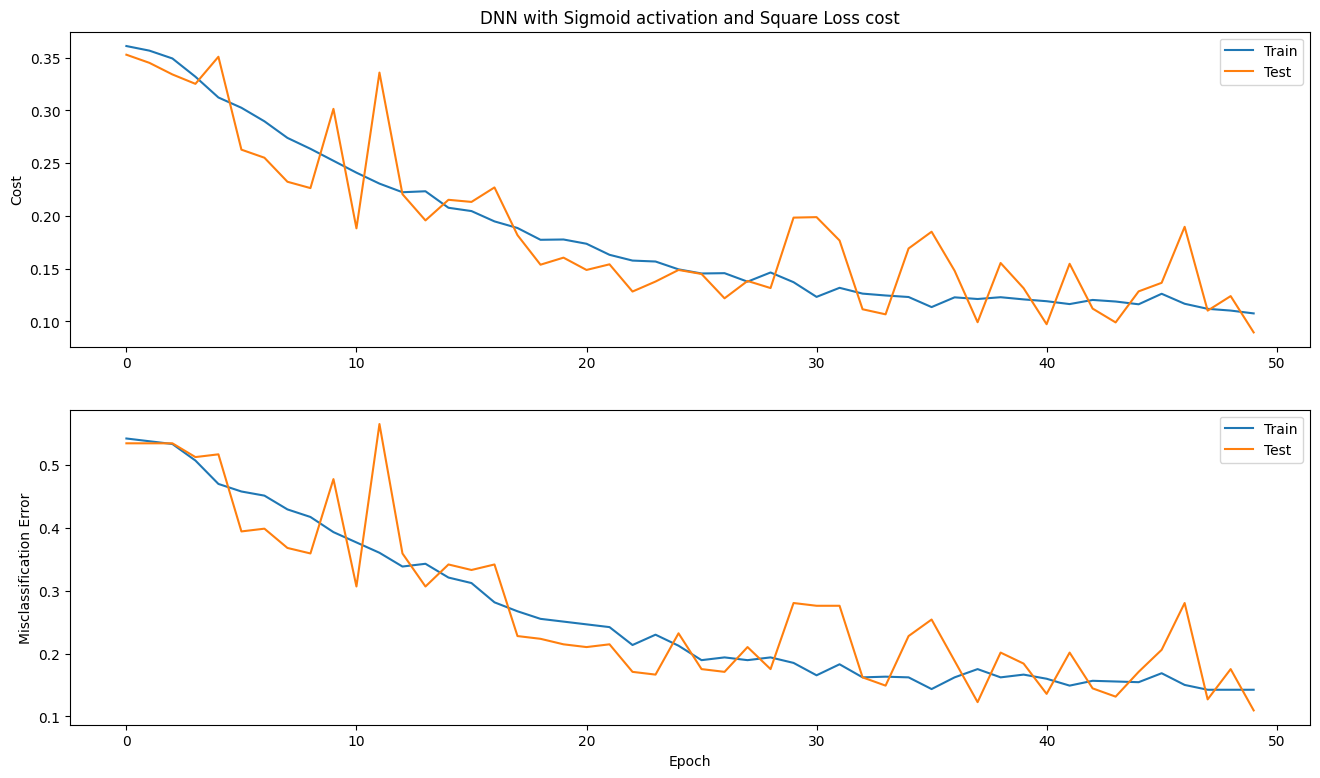

In [169]:
fig, axs = plt.subplots(2,1, figsize=(16,9))

plt.subplot(2,1,1)
plt.title("DNN with Sigmoid activation and Square Loss cost")
plt.ylabel('Cost')
plt.plot(epochs_span,cost_span_train_sig,cost_span_test_sig)
plt.legend(['Train', 'Test'])
plt.subplot(2,1,2)
plt.xlabel('Epoch')
plt.ylabel('Misclassification Error')
plt.plot(epochs_span,class_error_train_sig,class_error_test_sig)
plt.legend(['Train', 'Test'])
plt.show()

In [170]:
print("final cost of training:",cost_span_train_sig[epochs-1])
print("final classification error of training:",class_error_train_sig[epochs-1])
print("final cost of testing:",cost_span_test_sig[epochs-1])
print("final classification error of testing:",class_error_test_sig[epochs-1])

final cost of training: 0.1076266644905925
final classification error of training: 0.1425438596491228
final cost of testing: 0.08961514764516218
final classification error of testing: 0.10964912280701754


# Your Answer:

Using two layer DNN, with the first layer having 40 neurons and the second having 30 neurons, we got to a error rate of $\approx.11$ in 50 epochs and a constant learning rate of .1. Going to a higher epoch value seemed to increase the error rate, so <code>max_epoch=50</code> seemed ideal (at least for the tuning route I took). Doing more than 2 layers seemed to increase the error and cost, aas well as higher neuron counts. From what I did, $40 \rightarrow 30$ seemed best (or at least good enough)

Compared to the misclassification rate of the test set for the logistic regression (which got $\approx.14$), we can see that the DNN is slightly better with these settings.



---

## Q3.2 Deep neural network with Relu function and squared loss (15pt)

Another popular choice of the activation function is relu function.

(a) Modify your code to use Relu function in these hidden nueron layer and sigmoid/softmax function in the output layer. You may try  1 hidden layer of 1024 neurons in this case.  i.e.,

- A fully connected (linear) layer with an input of the `n_features` and output of 1024.
- A ReLU layer
- A fully connected (linear) layer with an input of 1024 and output of `n_classes`.
- A softmax function.


(b) Compare the performance with Q2 and Q3.1.


In [171]:
def forward_prop_combo(x, params, activation=Relu, output=Sigmoid):
    """
    Does the forward propogation step of NN that can use separate activation
    functions for the hidden layers and the output layer.
    Inputs:
        x: training data
        params: Parameters as dictionary
    Outputs:
        A: Final layer output, \vec a^{(L)}(x)
        caches: intermediate values stored, everything before applying
        activation function (\vec a^{(l-1)}, \vec z^{(l)})
    """
    A = x # input to first layer i.e. training data
    caches = []
    L = len(params)//2
    for l in range(L):
        A_prev = A

        # Linear transformation
        Z = np.dot(params['W'+str(l+1)], A_prev) + params['b'+str(l+1)]

        # storing the both linear and activation cache
        cache = (A_prev, Z)
        caches.append(cache)

        # Apply activation on hidden layer and output on output layer
        if l!=L-1:
            A  = activation(Z)
        else:
            A  = output(Z)
    return A, caches

def backward_prop_combo(AL, Y, caches, params, loss_function=Square_loss, activation=Relu, output=Sigmoid):
    """
    Does the forward propogation step of NN that can use separate activation
    functions for the hidden layers and the output layer.
    Inputs:
        AL: Final layer output, \vec a^{(L)}(x^{(i)})
        Y: one hot vector of the label y^{(i)}
        caches: intermediate values stored, everything before applying
        activation function (\vec a^{(l-1)}, \vec z^{(l)}), l=1,2,\dots,L
        params: Parameters as dictionary, params[W1], \dots, params[WL],
        params[b1],\dots, params[bL]
        loss_function: choice of loss function (Square_loss or Logistic_loss)
        output: choice of output function (on first delta)
        activation: choice of activation function (on every other delta)
    Outputs:
        grads: gradients as dictionary, grads[W1], \dots, grads[WL],grads[b1],\dots, grads[bL]
    """
    grads = {}
    L = len(caches)
    AL1, ZL = caches[L-1]
    # initial delta
    delta_L = loss_function(AL, Y, derivative=True) * output(ZL, derivative=True)
    grads['db'+str(L)] = delta_L
    grads['dW'+str(L)] = np.array([delta_L]).T  @ np.array([AL1])
    delta_prev = delta_L
    # the rest of the deltas
    for l in reversed(range(L-1)):
        delta_curr  = delta_prev
        A_prev, Z_curr = caches[l]
        W_curr  = params['W'+str(l+2)]
        delta_prev = np.dot(W_curr.T, delta_curr) * activation(Z_curr, derivative=True)
        grads['db'+str(l+1)] = delta_prev
        grads['dW'+str(l+1)] = np.array([delta_prev]).T  @ np.array([A_prev])

    return grads

def train_NN_combo(Xtrain, Ytrain_vec, Xtest, Ytest_vec, epochs, layer_dim, learning_rate, cost_function=Square_loss, activation=Relu, output=Sigmoid):
    """
    specific NN that does the forward propogation using relu as the activation,
    then sigmoid for the output layer.
    """
    # Step 0: Initialization
    params = init_params(layer_dim)
    N      = Xtrain.shape[0]

    cost_span_train = np.zeros(epochs)
    class_error_train = np.zeros(epochs)
    cost_span_test = np.zeros(epochs)
    class_error_test = np.zeros(epochs)

    # Training the neural network
    arr = np.arange(N)
    for i in range(epochs):
        l_rate   = learning_rate[i]
        np.random.shuffle(arr)

        cost_i = 0
        class_error = 0

        for j in arr:
            # Step 1: forward propogation (with activation as Relu and output as Sigmoid)
            Y_hat, caches = forward_prop_combo(Xtrain[j], params, activation, output)
            cost_i += cost_function(Y_hat,Ytrain_vec[j])
            # Step 2: backward propogation
            grads  = backward_prop_combo(Y_hat, Ytrain_vec[j], caches, params, cost_function, activation, output)
            # Step 3 (optional for SGD): updating parameters
            params = update_parameters(params, grads, l_rate)
            if np.argmax(Y_hat) != np.argmax(Ytrain_vec[j]):
                class_error += 1

        # appending training data
        cost_span_train[i] = cost_i/N
        class_error_train[i] = class_error/N

        print('At epochs '+ str(i+1) + ', the cost is ' + str(cost_i/N))

        # reinit for testing data
        cost_i = 0
        class_error = 0

        # getting testing data
        for j in range(Xtest.shape[0]):
            Y_hat, caches = forward_prop_combo(Xtest[j], params, activation, output)
            cost_i += cost_function(Y_hat,Ytest_vec[j])
            if np.argmax(Y_hat) != np.argmax(Ytest_vec[j]):
                class_error += 1

        # appending testing data
        cost_span_test[i] = cost_i/Xtest.shape[0]
        class_error_test[i] = class_error/Xtest.shape[0]

    return params, cost_span_train, class_error_train, cost_span_test, class_error_test


In [172]:
# Q3.2

n,d = X_train.shape
n_classes = np.unique(y_train).shape[0]
onehot_y_train = onehot(y_train, n_classes)
onehot_y_test = onehot(y_test, n_classes)

# For this particular question, do not add more layers, as the above
# train_NN requires this "layer_dim" to have size = 3

layer_dim = [X_train.shape[1], 1024, n_classes]

epochs = 50
epochs_span = np.arange(epochs)
# constant learning rate
learning_rate = .1*np.ones(epochs)
cost_function = Square_loss

# train NN for Relu activation, Sigmoid output and Square Loss cost functions
params_relu, cost_span_train_relu, class_error_train_relu, cost_span_test_relu, class_error_test_relu = train_NN_combo(X_train, onehot_y_train, X_test, onehot_y_test, epochs, layer_dim, learning_rate, cost_function, activation=Relu, output=Sigmoid)


At epochs 1, the cost is 0.5026046688761254
At epochs 2, the cost is 0.37482394721603085
At epochs 3, the cost is 0.3502151443789121
At epochs 4, the cost is 0.33923146945033794
At epochs 5, the cost is 0.33749002285011226
At epochs 6, the cost is 0.32498003545197374
At epochs 7, the cost is 0.3177520034705299
At epochs 8, the cost is 0.318340596281635
At epochs 9, the cost is 0.31348177472962513
At epochs 10, the cost is 0.3050908613476839
At epochs 11, the cost is 0.2968516332959037
At epochs 12, the cost is 0.2876954898649454
At epochs 13, the cost is 0.2882485241007322
At epochs 14, the cost is 0.2791433351441614
At epochs 15, the cost is 0.26876087764474793
At epochs 16, the cost is 0.26266065549277623
At epochs 17, the cost is 0.26255864530147077
At epochs 18, the cost is 0.25157856433510883
At epochs 19, the cost is 0.2559470635348821
At epochs 20, the cost is 0.24246291023494823
At epochs 21, the cost is 0.24712554531813596
At epochs 22, the cost is 0.23317647330176738
At epoch

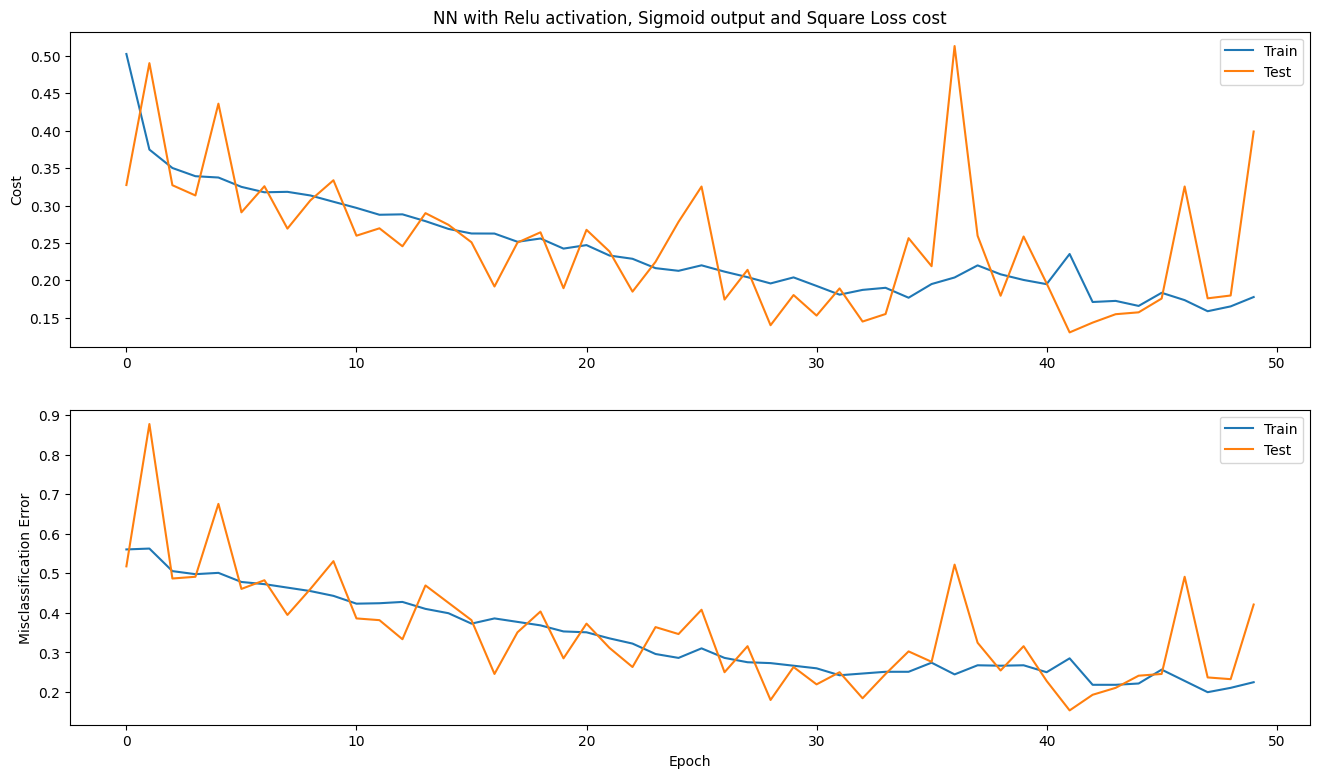

In [173]:
fig, axs = plt.subplots(2,1, figsize=(16,9))

plt.subplot(2,1,1)
plt.title("NN with Relu activation, Sigmoid output and Square Loss cost")
plt.ylabel('Cost')
plt.plot(epochs_span,cost_span_train_relu,cost_span_test_relu)
plt.legend(['Train', 'Test'])
plt.subplot(2,1,2)
plt.xlabel('Epoch')
plt.ylabel('Misclassification Error')
plt.plot(epochs_span,class_error_train_relu,class_error_test_relu)
plt.legend(['Train', 'Test'])
plt.show()

In [174]:
print("final cost of training:",cost_span_train_relu[epochs-1])
print("final classification error of training:",class_error_train_relu[epochs-1])
print("final cost of testing:",cost_span_test_relu[epochs-1])
print("final classification error of testing:",class_error_test_relu[epochs-1])

final cost of training: 0.17770862538472945
final classification error of training: 0.22478070175438597
final cost of testing: 0.39896751449547996
final classification error of testing: 0.42105263157894735


# Your Answer:

Compared to the other two models, this NN is much worse. It did eventually reach some kind on convergence around epoch 30, which is "more efficient" than the other two, the runtime was 30 seconds PER epoch, which is ridiculously high. After fiddling with the neuron count, the classification error was worse, so keeping neuron count high was best for the model. The testing data also seems to be much more sensitive to randomness, giving us a much less hugging plot when compared to the other models. That's not even taking into account that the final cost and misclassification rate for the NN is worse than the other two models.

Perhaps with some tuning, this could reach the level of one of the other two models, but without reducing the runtime, it's not really worth it.



---



---




# Q4: (optional) Deep neural network with logistic loss (10pt)
(a) What about switching to logistic loss? Do you find it is nearly impossible to tune here due to the vanishing gradient and other errors/warnings?

(b) Please dig out the root cause and fix it! You should get similar performance as the square loss.

